# Livneh Wrfcf Root Mean Sq Error 2017-02-05 to 2017-02-17  

In [1]:
# imports
import numpy
import Nio
import Ngl
from IPython import display
import netCDF4 as nc
from datetime import date
from datetime import timedelta
import xarray as xr
import xesmf as xe
import pandas as pd

In [2]:
# read in daily difference datasets
dif_06 = xr.open_dataarray('./dif_06_prev-Copy1.nc')
dif_07 = xr.open_dataarray('./dif_07_prev-Copy1.nc')
dif_08 = xr.open_dataarray('./dif_08_prev-Copy1.nc')
dif_09 = xr.open_dataarray('./dif_09_prev-Copy1.nc')
dif_10 = xr.open_dataarray('./dif_10_prev-Copy1.nc')
dif_11 = xr.open_dataarray('./dif_11_prev-Copy1.nc')
dif_12 = xr.open_dataarray('./dif_12_prev-Copy1.nc')
dif_13 = xr.open_dataarray('./dif_13_prev-Copy1.nc')
dif_14 = xr.open_dataarray('./dif_14_prev-Copy1.nc')
dif_15 = xr.open_dataarray('./dif_15_prev-Copy1.nc')
dif_16 = xr.open_dataarray('./dif_16_prev-Copy1.nc')

#dif_arr = [dif_05, dif_06, dif_07, dif_08, dif_09, dif_10, dif_11, dif_12, dif_13, dif_14, dif_15, dif_16, dif_17]
dif_arr = [dif_06, dif_07, dif_08, dif_09, dif_10, dif_11, dif_12, dif_13, dif_14, dif_15]

In [3]:
# rmse
def rmse():
    sq_arr = []
    for i in dif_arr:
        sq_dif = numpy.square(i)
        sq_arr.append(sq_dif)
    sum_arr = sq_arr[0]
    for j in sq_arr[1:]:
        sum_arr += j
    mean_sq = sum_arr / 10
    rmse = numpy.sqrt(mean_sq)
    return rmse

rm = rmse()
rm.to_netcdf('./wrf_rmse_prev.nc')
rm

<xarray.DataArray (lat: 444, lon: 922)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 25.16 25.22 25.28 25.34 ... 52.66 52.72 52.78 52.84
  * lon      (lon) float64 -124.6 -124.5 -124.5 -124.4 ... -67.16 -67.09 -67.03

In [4]:
# for reference
numpy.unique(rm), max(numpy.unique(rm)), min(numpy.unique(rm))

(array([0.45694432, 0.51836353, 0.53057578, ...,        nan,        nan,
               nan]),
 12.08070286576286,
 0.4569443204657368)

In [5]:
# convert array to masked array to overlook NaNs
import numpy.ma as ma
m_out = ma.masked_invalid(rm)
m_out

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

In [6]:
# numerical data, average rmse over entire region
def overall_rmse():
    sq_arr = []
    for i in dif_arr:
        sq_dif = numpy.square(i.data)
        sq_arr.append(sq_dif)
    arr_sq = [x for x in sq_arr[0].flatten() if str(x) != 'nan']
    div = sum(arr_sq) / len(arr_sq)
    return numpy.sqrt(div)
overall_rmse()

3.854825209326463

In [7]:
# workstation
wks_type2 = "png"
wks2 = Ngl.open_wks(wks_type2,"17_rmse_NG-GR-NQ-BD")

In [8]:
# borrow RHS plot end coords
fn = '/cw3e/mead/projects/cwp103/production/output/2017020500/cf/NG-GR-NQ-BD/wrfcf_d02_2017-02-05_22_00_00.nc'
da_input = xr.open_dataset(fn)

In [9]:
# defining variables
temp = m_out
lat = rm['lat'].data.flatten()
lon = rm['lon'].data.flatten()
lat2 = da_input['lat'].data.flatten()
lon2 = da_input['lon'].data.flatten()
tmax_nlat = len(lat)
tmax_nlon = len(lon)

In [10]:
# XY of overlay plot
resources = Ngl.Resources()
resources.sfXCStartV = min(lon)
resources.sfXCEndV   = max(lon)
resources.sfYCStartV = min(lat)
resources.sfYCEndV   = max(lat)

# fill missing values as needed
if hasattr(temp,"_FillValue"):
    resources.sfMissingValueV = temp[0]._FillValue

# color map (sensitive to smaller values)
cmap = ['Ghostwhite', 'Grey0', 
        'Purple4', 'RoyalBlue3', 'RoyalBlue1', 'DeepSkyBlue', 'Cyan', 'DarkTurquoise', 
        'SeaGreen2', 'SpringGreen', 'Chartreuse', 'GreenYellow', 'OliveDrab2', 'Yellow', 
        'Gold', 'Orange', 'DarkOrange', 'Red', 'Red']

# plot styling
resources.wkColorMap = cmap
Ngl.set_values(wks2,resources)
resources.cnLevelSelectionMode = "ManualLevels"
resources.cnMinLevelValF       = 0
resources.cnMaxLevelValF       = 10
resources.cnLevelSpacingF      = 1
resources.tiXAxisString = "~F25~Longitude"
resources.tiYAxisString = "~F25~Latitude"
resources.cnFillOn              = True    
resources.cnLineLabelsOn        = False  
resources.cnInfoLabelOn         = False  
resources.nglSpreadColorEnd     = -2
resources.mpProjection = "LambertEqualArea" 
resources.mpCenterLonF = (lon[tmax_nlon-1] + lon[0])/2
resources.mpCenterLatF = (lat[tmax_nlat-1] + lat[0])/2
resources.mpLimitMode = "LatLon"
resources.mpMinLonF   = min(lon2)
resources.mpMaxLonF   = max(lon2)
resources.mpMinLatF   = min(lat2)
resources.mpMaxLatF   = max(lat2)
resources.mpOutlineBoundarySets = "GeophysicalAndUSStates"
resources.mpPerimOn   = True
resources.cnLinesOn   = False
resources.pmTickMarkDisplayMode = "Never"
resources.tiMainString = "~F26~Wrfcf, Livneh RMSE, 2017-02-05 to 2017-02-17, NG-GR-NQ-BD"
resources.lbOrientation  = "Horizontal"
resources.lbTitleString  = "~F25~Temp (C)" 

In [11]:
# plot
map = Ngl.contour_map(wks2,temp,resources)

In [12]:
# clean up
del map
del resources
Ngl.end()

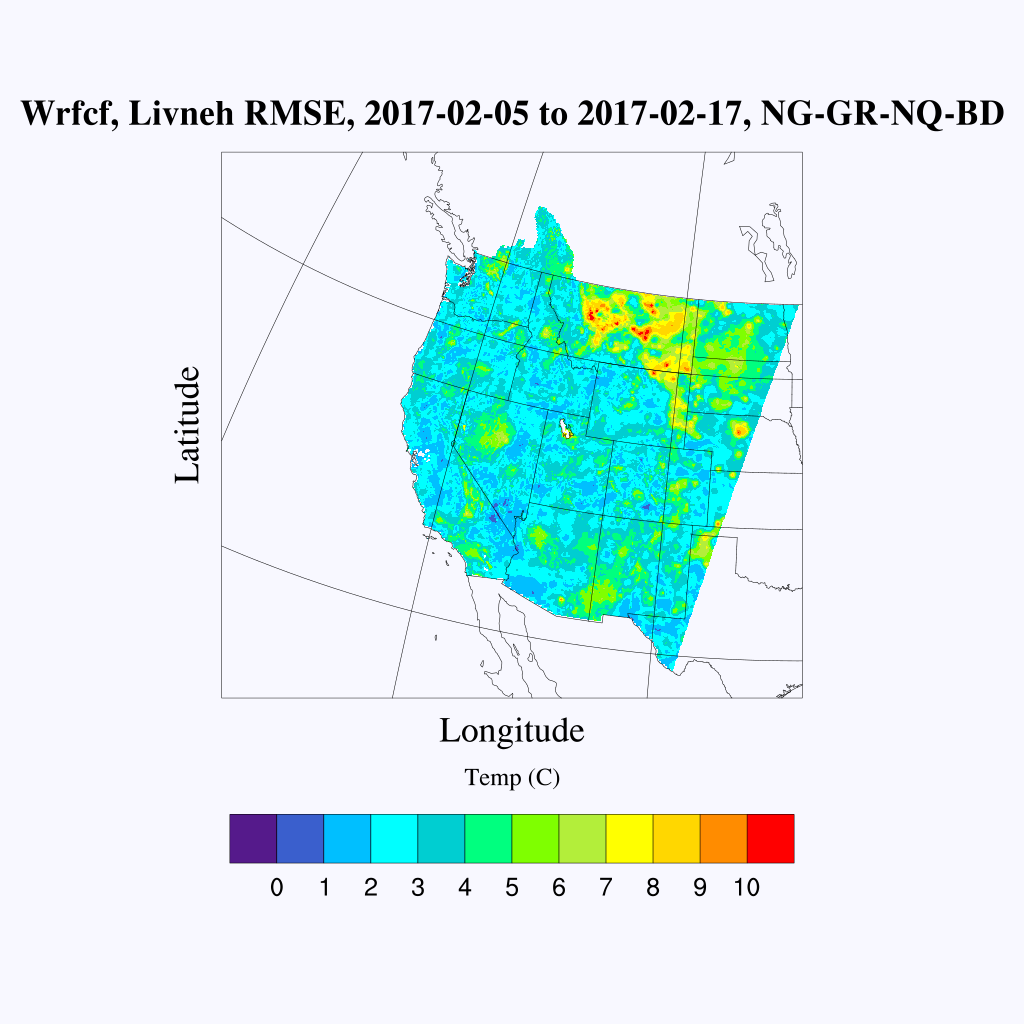

In [13]:
# display plot
display.Image("./17_rmse_NG-GR-NQ-BD.png")

fin.